# 𝑻𝑯𝑬 𝑺𝑷𝑨𝑹𝑲𝑺 𝑭𝑶𝑼𝑵𝑫𝑨𝑻𝑰𝑶𝑵

### Author: Riyaz Mehendi Khorasi

## Task 6- Prediction using Decision Tree Algorithm

#### Creating the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

 Decision tree is the most powerful and popular algorithm for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
 

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal but are also a popular tool in machine learning. Generally,the basic algorithm used in decision trees is known as the ID3 (by Quinlan) algorithm. The ID3 algorithm builds decision trees using a top-down, greedy approach.

A decision tree consists of three types of nodes:

    Root Nodes
    Decision Nodes
    Leaf Nodes
Each node in the tree acts as a test case for some attribute and each edge descending from that node corresponds to one of the possible answers to the test case.
This process is recursive and is repeated for every subtree rooted at the new nodes.

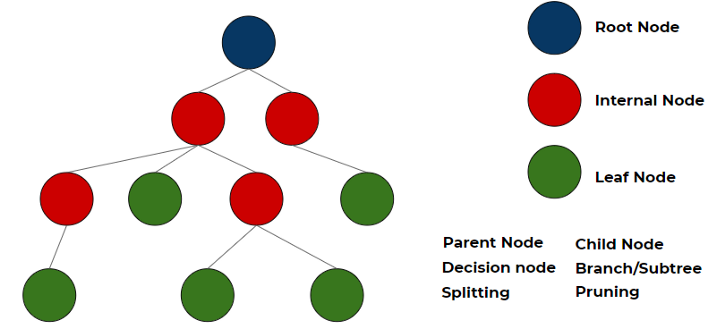

  -Parent node: In any two connected nodes, the one which is higher hierarchically, is a parent node.
  
  -Child node: In any two connected nodes, the one which is lower hierarchically, is a child node.
  
  -Root node: The starting node from which the tree starts, It has only child nodes. The root node does not have a parent node. 
  
  -Leaf Node/leaf: Nodes at the end of the tree, which do not have any children are leaf nodes or called simply leaf. 
  -Internal nodes/nodes: All the in-between the root node and the leaf nodes are internal nodes or simply called nodes. internal nodes have both a parent and at least one child. 
  
  -Splitting: Dividing a node into two or more sub-nodes or adding two or more children to a node.
  
  -Decision node: when a parent splits into two or more children nodes then that node is called a decision node.
  
  -Pruning: When we remove the sub-node of a decision node, it is called pruning. You can understand it as the opposite process of splitting.
  
  -Branch/Sub-tree: a subsection of the entire tree is called a branch or sub-tree

 Decision Trees can be applied to both Regression and Classification Problems.

--Regression Trees are used for continuous quantitative target variables.

--Classification Tree are used for discrete categorical target variables.

### Importing the Required Libraries and Reading the data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
#Loading dataset
iris_data=pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis (EDA)

In [3]:
iris_data.shape

(150, 6)

In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#dropping id column
iris_data=iris_data.drop("Id",axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#checking null values
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are three classes of iris plants: 'setosa', 'versicolor' and 'virginica'. Now, we have imported the iris data in the variable 'data'. We will now extract the attribute data and the corresponding labels. We can extract the attributes and labels by calling .data and .target as shown below:

In [8]:
print("Classes to predict:", iris_data['Species'].unique())

Classes to predict: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

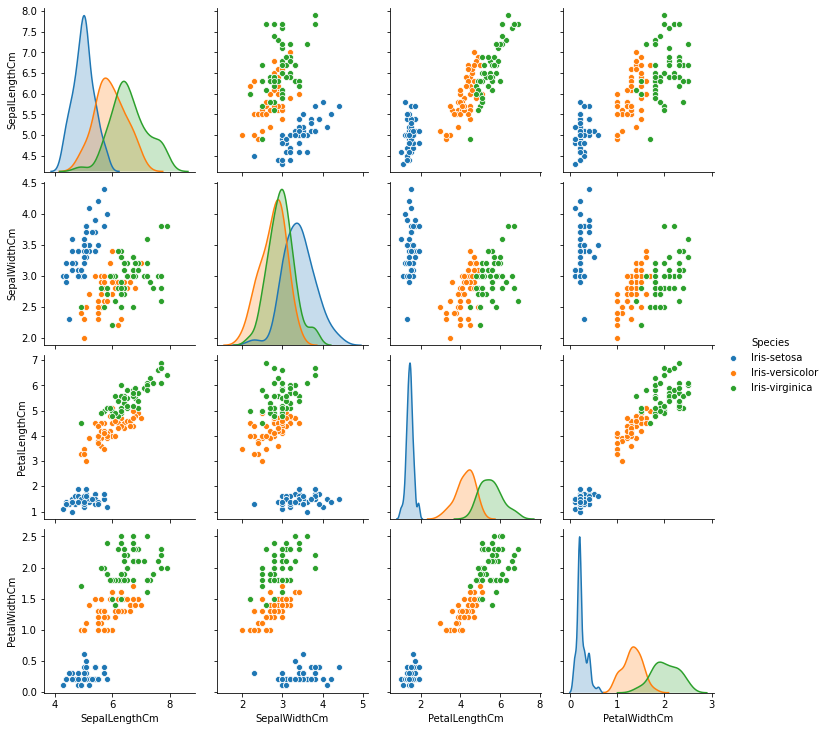

In [10]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=iris_data, hue = 'Species')

We can observe that setosa always forms a different cluster from the other two.

<AxesSubplot:>

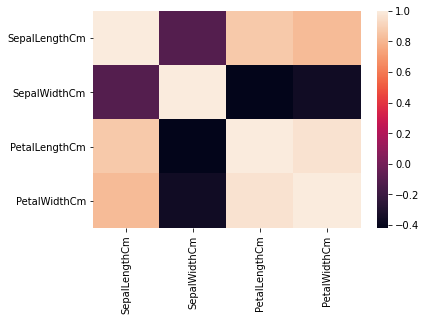

In [11]:
# correlation matrix
sns.heatmap(iris_data.corr())

From above we observe:

    Petal length is highly related to petal width.
    Sepal length is not related to sepal width.

### Data Preprocessing

In [12]:
# Defining variables X and Y from the Dataset
X = iris_data.drop('Species', axis =1)
Y= iris_data['Species']

In [13]:
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

 Y has categorical variables stored in it we will encode it in numeric values for working.

In [15]:
#label encoding
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We get its encoding as above, setosa:0, versicolor:1, virginica:2

Splitting the dataset into training and testing sets. selecting 20% records randomly for testing

In [16]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.20, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


After splitting the dataset we have 120 records(rows) for training and 30 records for testing purposes.

### Model Building

In [17]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# Predicting the values of test data
y_pred = d_tree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=d_tree.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  1.0


We got an accuracy of 100% on the testing dataset of 30 records.

Text(0.5, 1.0, 'Accuracy Score: 1.0')

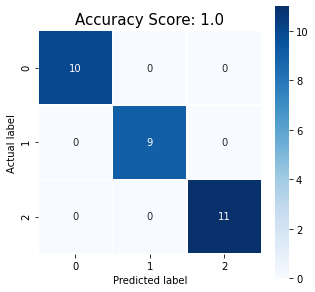

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(d_tree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#### Visualizing the decision tree
We can directly plot the tree that we build using the following commands

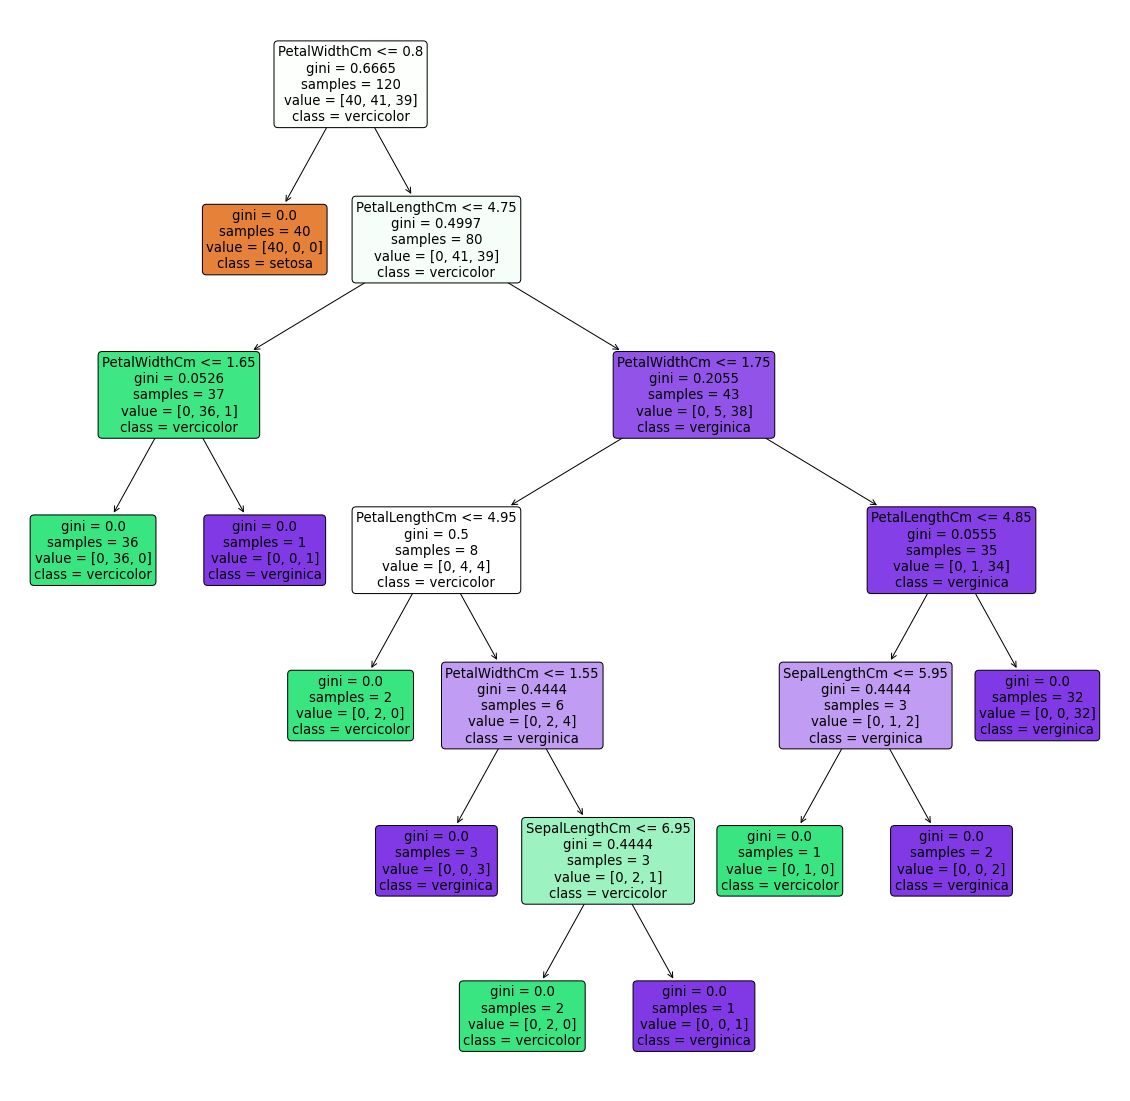

In [21]:
#Visualising the tree without the use of graphviz
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=d_tree, feature_names = X.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)